In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [114]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [115]:
figsize2 = [10, 5]
figsize3 = [12, 8]
sh2kwargs = {"figsize": [10, 5]}
sh3kwargs = {"figsize": [12, 8]}

In [116]:
def show2d(points, figsize=None):
    xs, ys, zs = points
    plt.figure(figsize=figsize)
    # plt.subplot(131, aspect='equal')
    # plt.plot(zs, xs, 'x')
    # plt.xlabel("z")
    # plt.ylabel("x")
    plt.subplot(121, aspect='equal')
    plt.plot(xs,ys, 'x')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(122, aspect='equal')
    plt.plot(zs,ys, 'x')
    plt.xlabel("z")
    plt.ylabel("y")
    plt.tight_layout()
    
    
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
def show3d(points, ax=None, figsize=None, **kwargs):
    xs, ys, zs = points

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d', aspect="equal")
    ax.scatter(xs, ys, zs, **kwargs)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    set_axes_equal(ax)
    plt.tight_layout()
    
    return ax

# Izotropic

In [117]:
xi1 = np.random.rand(500)
xi2 = np.random.rand(500)
theta = np.arccos(1.0-(xi1*1))
phi = xi2 * 2 * np.pi

xs = np.sin(theta) * np.cos(phi)
ys = np.sin(theta) * np.sin(phi)
zs = np.cos(theta)

pts = [xs, ys, zs]

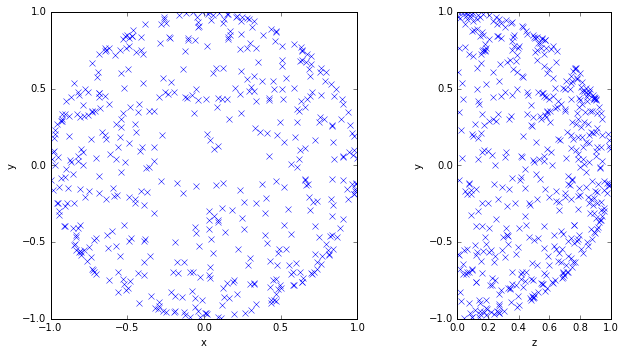

In [118]:
show2d(pts, figsize=figsize2)

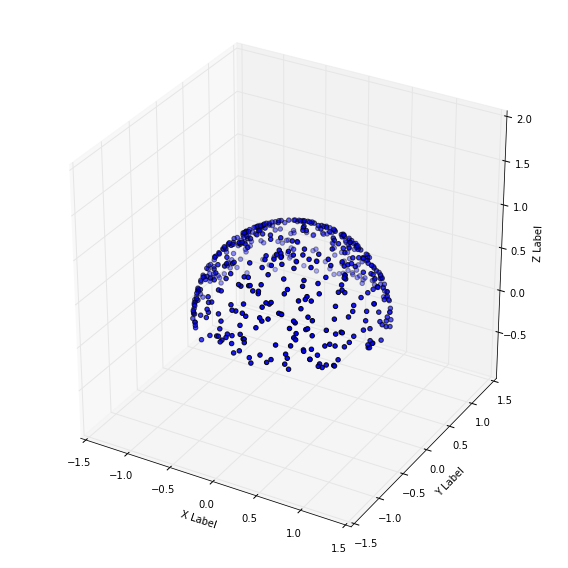

In [119]:
show3d(pts, figsize=figsize3)

# Anisotropic

In [120]:

def cart2spher(vectors, axis_order=[0, 1, 2]):
    """
    Convert the cartesians to sphericals 

    @param vectors:  vectors [[x0, ...], [y0, ...], [z0, ...]].
    @return:        spherical coordinates [[radius0,....], [theta0, ...], [phi0, ...]].
    """

    # print axis_order
    vectors = np.asarray(vectors)
    if vectors.shape[0] is not 3:
        raise ValueError('Expected vector shape is [3, N]') #, 'foo', 'bar', 'baz') 
    # radius distance
    radius = np.linalg.norm(vectors, axis=0)
    normalized = vectors / radius
    
    # polar angle
    theta = np.arccos(normalized[axis_order[2]])
    # azimuth
    phi = np.arctan2(normalized[axis_order[1]], normalized[axis_order[0]])
    return np.asarray([radius, theta, phi])

def alpha_beta_from_vector(vectors, axis_order=[0,1,2]):
    vectors = np.asarray(vectors)
    if vectors.shape[0] is not 3:
        raise ValueError('Expected vector shape is [3, N]') #, 'foo', 'bar', 'baz') 
    # radius distance
    radius = np.linalg.norm(vectors, axis=0)
    normalized = vectors / radius
    
    cosb = + np.sqrt(normalized[axis_order[1]] + normalized[axis_order[2]])
    sinb = normalized[axis_order[0]]
    
    
    beta = np.arctan2(sinb, cosb)
    
    sina = -normalized[axis_order[1]] / cosb
    cosa = +normalized[axis_order[2]] / cosb
    alpha = np.arctan2(sina, cosb)
    
    return np.asarray([radius, alpha, beta])
    
    

def random_vector_along_axis(sigma=1.0, size=1, axis_order=[0, 1, 2]):
    """
    Produces random vector along selected axis
    """
    beta = np.random.normal(scale=sigma, size=size)
    # alpha - dokola
    alpha = 2 * np.pi * np.random.rand(size)
    # alpha = [0.] * size 
    beta = 0.5 * np.pi - np.asarray(beta)
    z = [np.sin(beta), -np.cos(beta) * np.sin(alpha), np.cos(beta)*np.cos(alpha)]
    
    z_ordered = [z[axis_order[0]], z[axis_order[1]], z[axis_order[2]]]
    return np.asarray(z_ordered)

def rotate_vector(vectors, alpha, beta):
    sa = np.sin(alpha)
    sb = np.sin(beta)
    ca = np.cos(alpha)
    cb = np.cos(beta)
    R1 = [
        [1, 0, 0], 
        [0, ca, -sa], 
        [0, sa, ca]]
    R2 = [
        [cb, 0, sb], 
        [0, 1, 0], 
        [-sb, 0, cb]]

    ptsr = np.matmul(np.matmul(R1, R2), vectors)
    
    return ptsr

def random_vector_along_direction(direction, sigma, size=1, axis_order1=[0, 1, 2], axis_order2=[0, 1, 2]):
    """
    Generates unit vectors along selected direction 
    
    
    """
    # dir_sph = cart2spher(direction, axis_order=axis_order1)
    dir_sph = alpha_beta_from_vector(direction, axis_order=axis_order1)
    vecs = random_vector_along_axis(sigma=sigma, size=size, axis_order=axis_order2)
    vecs_r = rotate_vector(vecs, dir_sph[1], dir_sph[2])
    
    return vecs_r

## Random vector along one axis

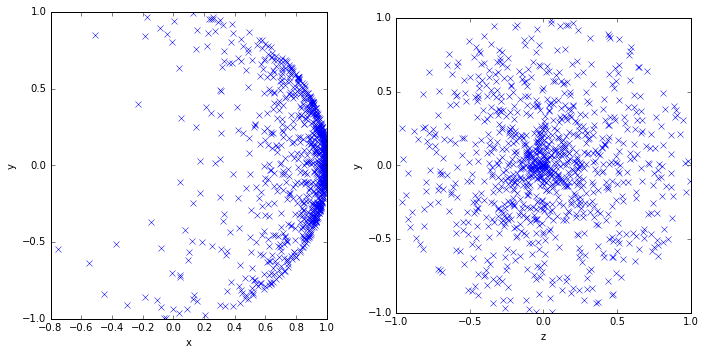

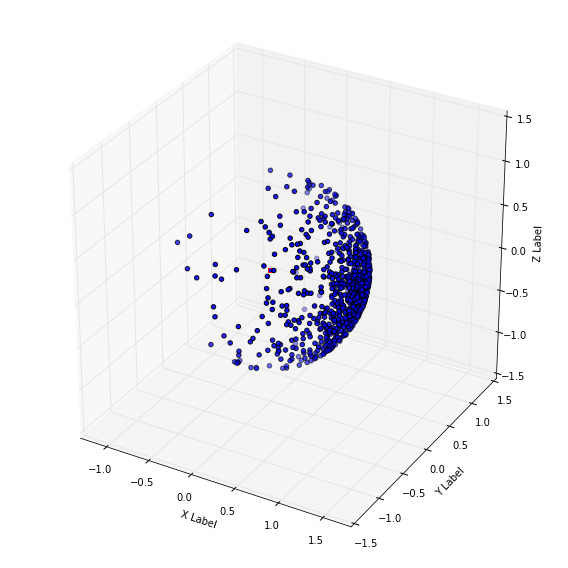

In [137]:
sigma = .7
size = 1000

xs, ys, zs = random_vector_along_axis(sigma, size)

pts = [xs, ys, zs]
show2d(pts, figsize=figsize2)
ax = show3d(pts, **sh3kwargs)
ax = show3d([0,0,0], ax=ax, color="r", marker="s")

### sigma = 0.3

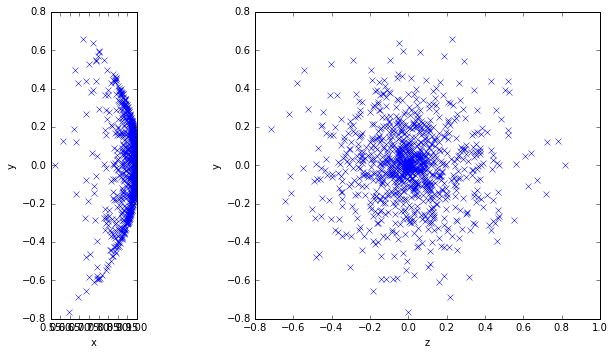

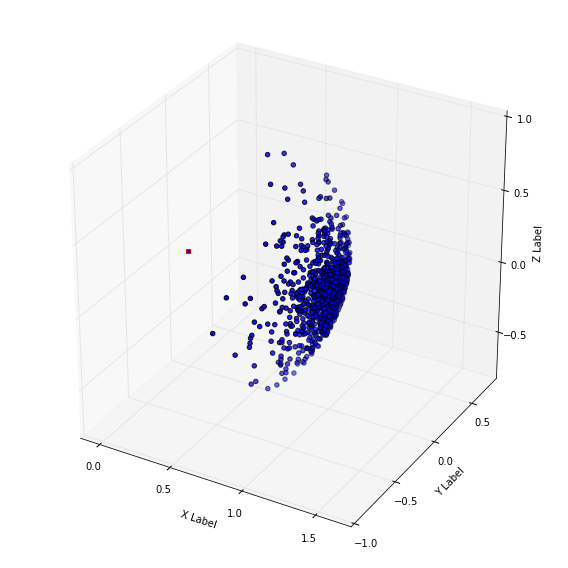

In [138]:
sigma = .3
size = 1000

xs, ys, zs = random_vector_along_axis(sigma, size)

pts = [xs, ys, zs]
show2d(pts, figsize=figsize2)

ax = show3d(pts, **sh3kwargs)
ax = show3d([0,0,0], ax=ax, color="r", marker="s")

## Vector rotation

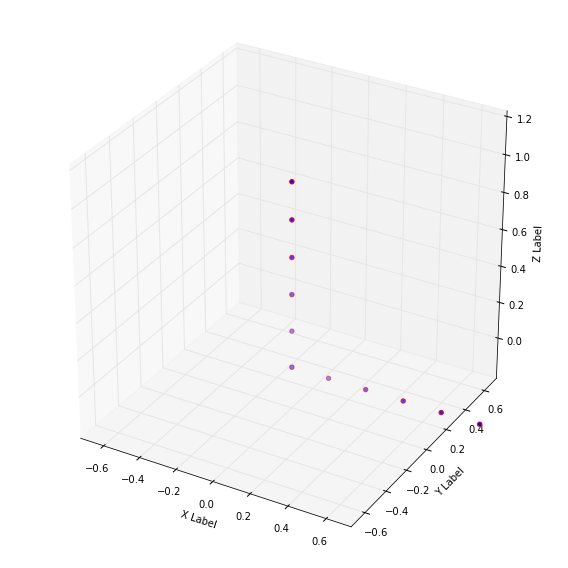

In [124]:
alpha = 0.0 * np.pi
beta = 0.5 * np.pi

pts = [
    [0, 0, 0],
    [0, 0, .2],
    [0, 0, .4],
    [0, 0, .6],
    [0, 0, .8],
    [0, 0, 1.],
]
pts = np.asarray(pts).T


ptsr = rotate_vector(pts, alpha, beta)

ax = show3d(pts, color="r", **sh3kwargs)
show3d(ptsr, ax=ax, color="r", **sh3kwargs)
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# 
# xs, ys, zs = pts
# ax.scatter(xs, ys, zs)
# xs, ys, zs = ptsr
# ax.scatter(xs, ys, zs)
# 
# 
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

plt.show()

### Rotated random vector along axis to new direction

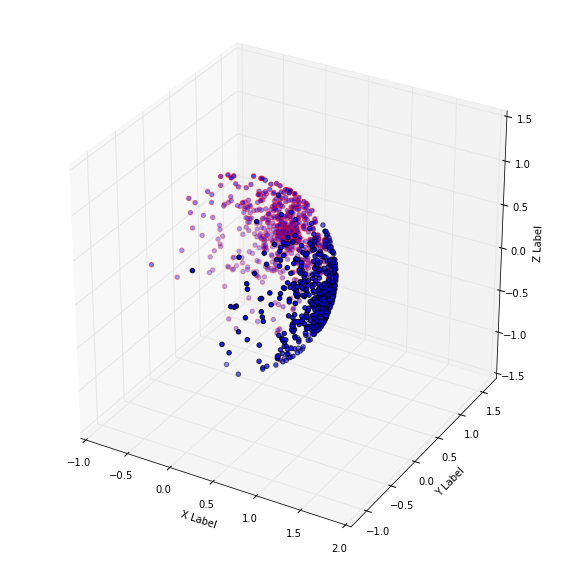

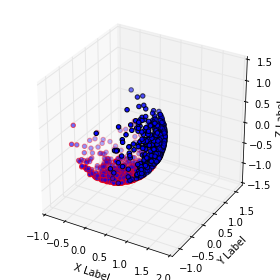

In [125]:
vec = random_vector_along_axis(sigma=0.5, size=600)
vecr = rotate_vector(vec, 0.5*np.pi, 0.5*np.pi)

ax = show3d(vec, **sh3kwargs)
show3d(vecr, ax=ax, color="r")


vecr = rotate_vector(vec, 0.0*np.pi, 0.5*np.pi)
ax = show3d(vec, )
show3d(vecr, ax=ax, color="r", **sh3kwargs)
plt.show()

In [126]:
print cart2spher(pts)
print cart2spher(pts, [1, 0, 2])

[[ 0.   0.2  0.4  0.6  0.8  1. ]
 [ nan  0.   0.   0.   0.   0. ]
 [ nan  0.   0.   0.   0.   0. ]]
[[ 0.   0.2  0.4  0.6  0.8  1. ]
 [ nan  0.   0.   0.   0.   0. ]
 [ nan  0.   0.   0.   0.   0. ]]


/Users/mjirik/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


In [127]:
pts = np.asarray([
    [1, 0., 0],
    [0, 1., 0],
    [0, 0., 1],
    [0, 0.2, 1],
    [0.7, 0., 0],
    [0.3, 0., 0],
]).T

pts =  [1, 0.2, .1]
print cart2spher(pts, [0, 1, 2])
print cart2spher(pts, [1, 0, 2])
print cart2spher(pts, [2, 0, 1])

[ 1.02469508  1.47305075  0.19739556]
[ 1.02469508  1.47305075  1.37340077]
[ 1.02469508  1.37435534  1.47112767]


In [128]:
vec = random_vector_along_direction([1,1,1], sigma=0.7, axis_order2=[0,1,2])
vec.squeeze()

array([ 0.91842406, -0.32620344,  0.22380476])

### Generate 3 different directions

/Users/mjirik/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in double_scalars
/Users/mjirik/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in double_scalars


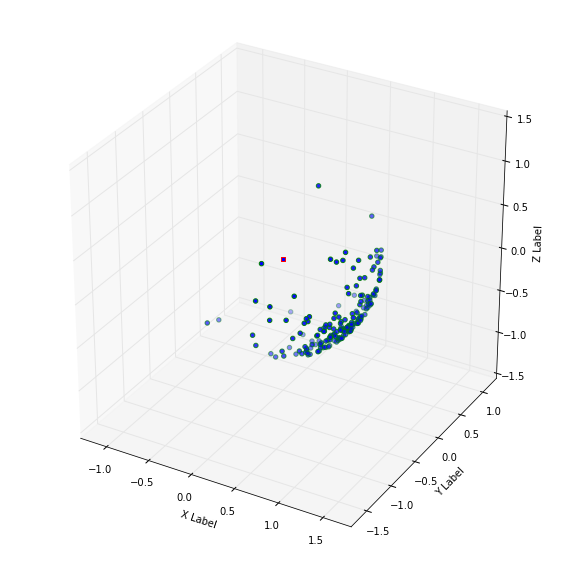

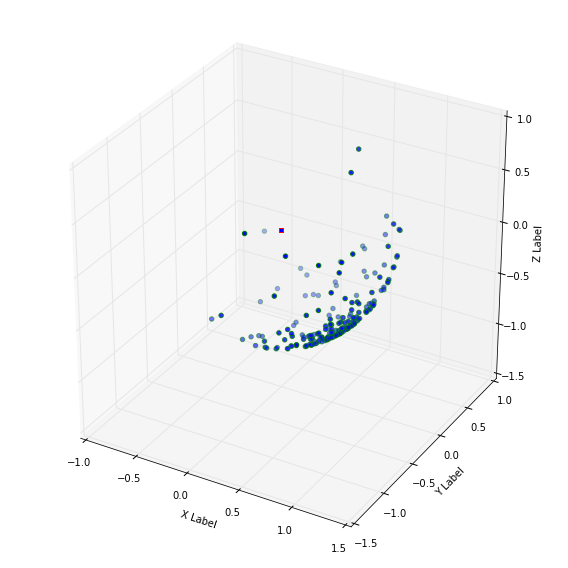

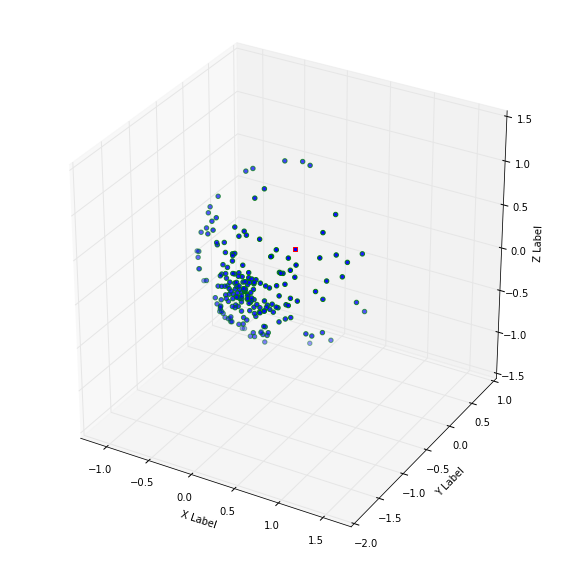

In [129]:

directions = [
    [1,1,1],
    [1,.1,.5],
    [.1,1,-1]
]
size = 200
sigma = 0.6

for direction in directions: 
    vecs_r = random_vector_along_direction(direction, sigma, size, axis_order2=[0,1,2])

    ax = show3d(vecs_r, color="g", **sh3kwargs)
    ax = show3d([0, 0, 0], color="r", ax=ax, marker="s")
    # ax = show3d(direction, color="r", **sh3kwargs, ax=ax)

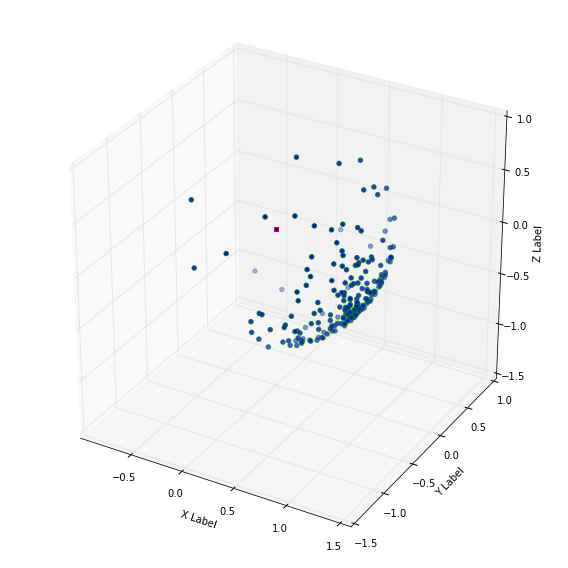

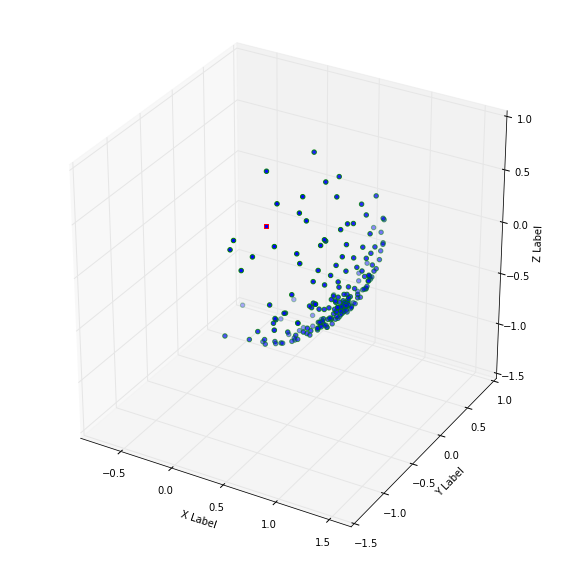

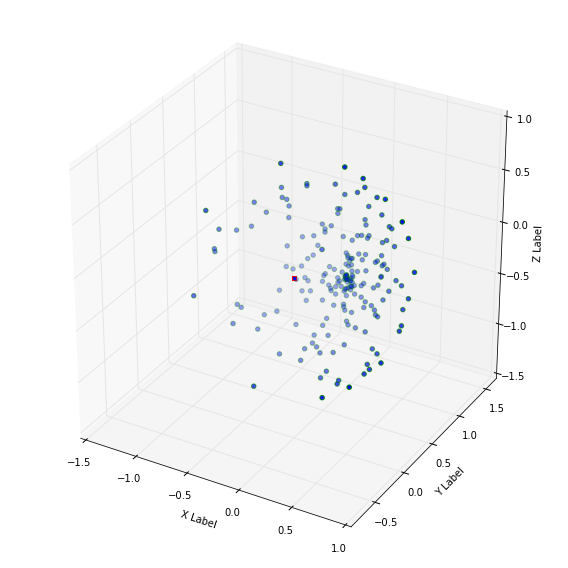

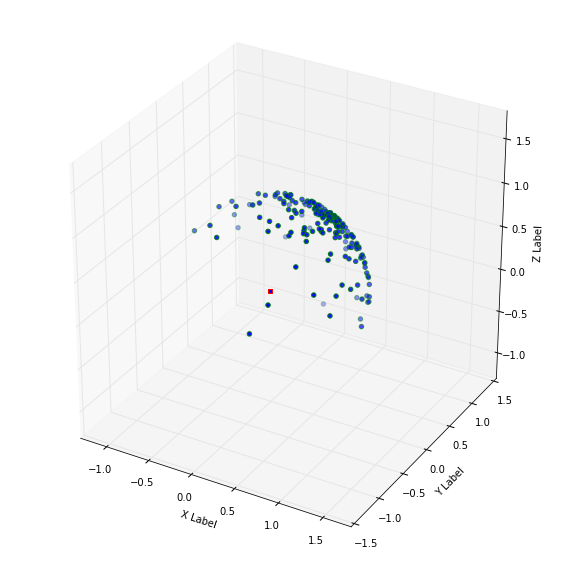

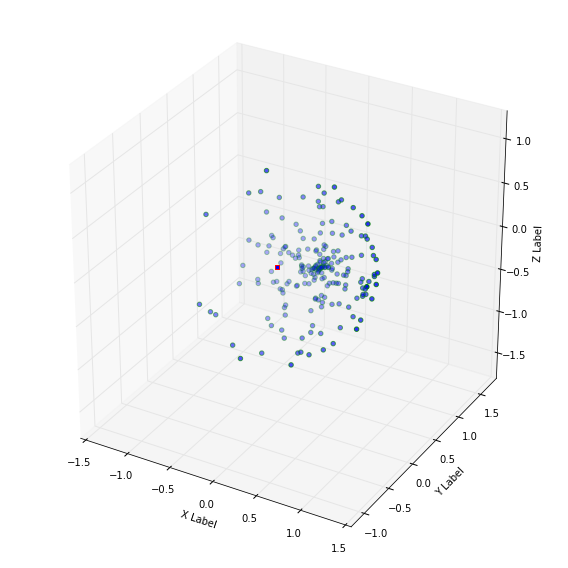

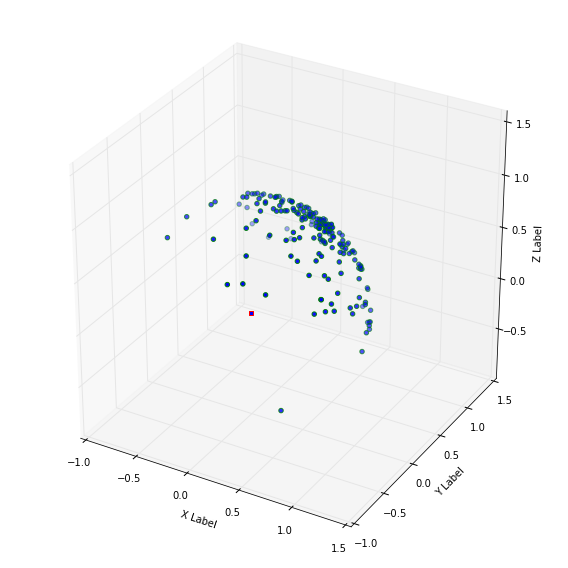

In [130]:
direction = [1,1,1]
size = 200
sigma = 0.6


import itertools
it = itertools.permutations([0, 1, 2])

dir2 = np.asarray(direction).reshape(-1,1)

for order in it: 
    #print order
    
    vecs_r = random_vector_along_direction(dir2, sigma, size, axis_order2=order)

    ax = show3d(vecs_r, color="g", **sh3kwargs) 
    ax = show3d([0, 0, 0], color="r", ax=ax, marker="s")
    # ax = show3d(dir2, color="r", ax=ax)
    


    plt.show()

